# Titanic NN

## 概要：
- 运行时间比较长的训练，还是应该弄个TensorBoard，方便监控结果，免得每次都需要用鼠标手动托页面查看最新的运行结果。
- 模型为全链接神经网络和统计学习方法。

## Result:


Reference: 
1. https://www.kaggle.com/c/titanic#tutorials
2. https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
3. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python/notebook


## 1. Preprocess

### Import pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

%matplotlib inline

In [2]:
import time
import os

project_name = 'Titanic'
step_name = 'StatML_NN'
date_str = time.strftime("%Y%m%d", time.localtime())
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

cwd = os.getcwd()
log_path = os.path.join(cwd, 'log')
model_path = os.path.join(cwd, 'model')
output_path = os.path.join(cwd, 'output')
print('model_path: ' + log_path)
print('model_path: ' + model_path)
print('model_path: ' + output_path)

run_name: Titanic_StatML_NN_20171030_234648
model_path: D:\Kaggle\Titanic_Machine_Learning_From_Disaster\log
model_path: D:\Kaggle\Titanic_Machine_Learning_From_Disaster\model
model_path: D:\Kaggle\Titanic_Machine_Learning_From_Disaster\output


### Import original data as DataFrame

In [3]:
data_train = pd.read_csv('./input/train.csv')
data_test = pd.read_csv('./input/test.csv')

display(data_train.head(2))
display(data_test.head(2))
data_train.loc[2, 'Ticket']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


'STON/O2. 3101282'

### Show columns of dataframe

In [4]:
data_train_original_col = data_train.columns
data_test_original_col = data_test.columns
print(data_train_original_col)
print(data_test_original_col)
# data_train0 = data_train.drop(data_train_original_col, axis = 1)
# data_test0  = data_test.drop(data_test_original_col, axis = 1)
# display(data_train0.head(2))
# display(data_test0.head(2))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Preprocess features

In [5]:
full_data = [data_train, data_test]

In [6]:
# Pclass
for dataset in full_data:
    temp = dataset[dataset['Pclass'].isnull()]
    if len(temp) == 0:
        print('Do not have null value!')
    else:
        temp.head(2)
        
for dataset in full_data:
    dataset['a_Pclass'] = dataset['Pclass']
#     display(dataset.head())

Do not have null value!
Do not have null value!


In [7]:
# Name
for dataset in full_data:
    dataset['a_Name_Length'] = dataset['Name'].apply(len)
#     display(dataset.head(2))

In [8]:
# Sex
for dataset in full_data:
    dataset['a_Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
#     display(dataset.head(2))

In [9]:
# Age
def is_child(age):
    if age >= 0 and age <=15:
        return 1
    return 0

for dataset in full_data:
    dataset['a_Age'] = dataset['Age'].fillna(-1)
    dataset['a_Have_Age'] = dataset['Age'].isnull().map({True: 0, False: 1}).astype(int)
    dataset['a_Is_Child'] = dataset['a_Age'].apply(is_child)
#     display(dataset[dataset['Age'].isnull()].head(2))
    display(dataset[dataset['Age']<=15].head(2))
    display(dataset.head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3,30,1,2.0,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,35,0,14.0,1,1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,23,1,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51,0,38.0,1,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,3,26,1,14.0,1,1
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S,3,25,1,9.0,1,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,16,1,34.5,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3,32,0,47.0,1,0


In [10]:
# SibSp and Parch
for dataset in full_data:
    dataset['a_FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['a_IsAlone'] = dataset['a_FamilySize'].apply(lambda x: 1 if x<=1 else 0)
#     display(dataset.head(2))

In [11]:
# Ticket(Very one have a ticket)
for dataset in full_data:
    dataset['a_Have_Ticket'] = dataset['Ticket'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Ticket'].isnull()].head(2))
#     display(dataset.head(2))

In [12]:
# Fare
for dataset in full_data:
    dataset['a_Fare'] = dataset['Fare'].fillna(-1)
    dataset['a_Have_Fare'] = dataset['Fare'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Fare'].isnull()].head(2))
#     display(dataset.head(2))

In [13]:
# Cabin
for dataset in full_data:
    dataset['a_Have_Cabin'] = dataset['Cabin'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Cabin'].isnull()].head(2))
#     display(dataset.head(2))

In [14]:
# Embarked
for dataset in full_data:
#     dataset['Embarked'] = dataset['Embarked'].fillna('N')
    dataset['a_Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2, None: 3} ).astype(int)
    dataset['a_Have_Embarked'] = dataset['Embarked'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Embarked'].isnull()].head(2))
#     display(dataset.head(2))

Name words segmentation and one-hote

In [15]:
# Name words segmentation
import re
name_words = []

# Inorder to allign columns of data_train and data_test, only data_train to fetch word
for name in data_train['Name']:
#     print(name)
    words = re.findall(r"[\w']+", name)
#     print(len(words))
#     print(words)
    for w in words:
        if w not in name_words:
            name_words.append(w)
# print(len(name_words))
name_words.sort()
# print(name_words)

In [16]:
# Add columns
for dataset in full_data:
    for w in name_words:
        col_name = 'a_Name_' + w
        dataset[col_name] = 0
    dataset.head(1)

In [17]:
# Name words one-hote
for dataset in full_data:
    for i, row in dataset.iterrows():
    #     print(row['Name'])
        words = re.findall(r"[\w']+", row['Name'])
        for w in words:
            if w in name_words:
                col_name = 'a_Name_' + w
                dataset.loc[i, col_name] = 1
#     display(dataset[dataset['a_Name_Braund'] == 1])

Cabin segmentation and one-hote

In [18]:
# Get cabin segmentation words
import re
cabin_words = []

# Inorder to allign columns of data_train and data_test, only data_train to fetch number
for c in data_train['Cabin']:
#     print(c)
    if c is not np.nan:
        word = re.findall(r"[a-zA-Z]", c)
#         print(words[0])
        cabin_words.append(word[0])
print(len(cabin_words))
cabin_words.sort()
print(np.unique(cabin_words))
cabin_words_unique = list(np.unique(cabin_words))

204
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']


In [19]:
def get_cabin_word(cabin):
    if cabin is not np.nan:
        word = re.findall(r"[a-zA-Z]", cabin)
        if word:
            return cabin_words_unique.index(word[0])
    return -1

for dataset in full_data:
    dataset['a_Cabin_Word'] = dataset['Cabin'].apply(get_cabin_word)
    # dataset['a_Cabin_Word'].head(100)

In [20]:
def get_cabin_number(cabin):
    if cabin is not np.nan:
        word = re.findall(r"[0-9]+", cabin)
        if word:
            return int(word[0])
    return -1

for dataset in full_data:
    dataset['a_Cabin_Number'] = dataset['Cabin'].apply(get_cabin_number)
    # dataset['a_Cabin_Number'].head(100)

In [21]:
# Clean data
# Reference: 
#    1. https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
#    2. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python/notebook
# full_data = [data_train, data_test]
# for dataset in full_data:
#     dataset['a_Name_length'] = dataset['Name'].apply(len)
#     #dataset['Sex'] = (dataset['Sex']=='male').astype(int)
#     dataset['a_Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
#     dataset['a_Age'] = dataset['Age'].fillna(0)
#     dataset['a_Age_IsNull'] = dataset['Age'].isnull()
#     dataset['a_FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
#     dataset['a_IsAlone'] = dataset['a_FamilySize'].apply(lambda x: 1 if x<=1 else 0)
#     dataset['a_Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
#     #dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 1 if type(x) == str else 0) # same as below
#     dataset['a_Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
#     dataset['a_Has_Embarked'] = dataset['Embarked'].isnull()
#     dataset['Embarked'] = dataset['Embarked'].fillna('N')
#     dataset['a_Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2, 'N': 3} ).astype(int)
#     dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# display(data_train.head(2))
# display(data_test.head(2))

In [22]:
survived = data_train['Survived']
data_train0 = data_train.drop(data_train_original_col, axis = 1)
data_test0  = data_test.drop(data_test_original_col, axis = 1)
display(data_train0.head(2))
display(data_test0.head(2))

features = data_train0
display(features.head(2))

,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,23,1,22.0,1,0,2,0,1,7.2500,...,0,0,0,0,0,0,0,0,-1,-1
1,1,51,0,38.0,1,0,2,0,1,71.2833,...,0,0,0,0,0,0,0,0,2,85


,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,16,1,34.5,1,0,1,1,1,7.8292,...,0,0,0,0,0,0,0,0,-1,-1
1,3,32,0,47.0,1,0,2,0,1,7.0000,...,0,0,0,0,0,0,0,0,-1,-1


,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,23,1,22.0,1,0,2,0,1,7.2500,...,0,0,0,0,0,0,0,0,-1,-1
1,1,51,0,38.0,1,0,2,0,1,71.2833,...,0,0,0,0,0,0,0,0,2,85


Check and confirm all columns is proccessed

In [23]:
for col in features.columns:
    if not col.startswith('a_'):
        print(col)

In [24]:
# Shuffle and split the train_data into train, crossvalidation and testing subsets
x_train, x_val, y_train, y_val = train_test_split(features, survived, test_size=0.2, random_state=2017)

In [25]:
# Show distribute of abave data sets
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
display(x_train.head(2))
display(y_train.head(2))

(712, 1545)
(179, 1545)
(712,)
(179,)


,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
304,3,33,1,-1.0,0,0,1,1,1,8.05,...,0,0,0,0,0,0,0,0,-1,-1
149,2,33,1,42.0,1,0,1,1,1,13.00,...,0,0,0,0,0,0,0,0,-1,-1


304    0
149    0
Name: Survived, dtype: int64

### Neuron network

In [26]:
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [27]:
def get_lr(x):
    lr = 2e-4 * 0.9 ** x
    if lr < 1e-5:
        lr = 1e-5
    print(lr)
    return lr

annealer = LearningRateScheduler(get_lr)

log_dir = os.path.join(log_path, run_name)
print('log_dir:' + log_dir)
tensorBoard = TensorBoard(log_dir=log_dir)

log_dir:D:\Kaggle\Titanic_Machine_Learning_From_Disaster\log\Titanic_StatML_NN_20171030_234648


In [28]:
# Initialising the ANN
model = Sequential()

# layers
model.add(Dense(units = 4096, activation = 'sigmoid', input_dim = 1545))
model.add(Dropout(0.5))
model.add(Dense(units = 4096, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = Adam(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])


x_val = x_val.as_matrix()
y_val = y_val.as_matrix()

hist = model.fit(x_train.as_matrix(), y_train.as_matrix(), 
                 batch_size = 8, 
                 verbose=1,
                 epochs = 100,
                 validation_data=(x_val, y_val), 
                 callbacks=[annealer, tensorBoard])

Train on 712 samples, validate on 179 samples
0.0002
Epoch 1/100
712/712 [==============================] - 25s - loss: 0.7308 - acc: 0.5646 - val_loss: 0.5518 - val_acc: 0.7654
0.00018
Epoch 2/100
712/712 [==============================] - 24s - loss: 0.6621 - acc: 0.6096 - val_loss: 0.6241 - val_acc: 0.7095
0.000162
Epoch 3/100
712/712 [==============================] - 24s - loss: 0.6450 - acc: 0.6236 - val_loss: 0.5102 - val_acc: 0.7598
0.00014580000000000002
Epoch 4/100
712/712 [==============================] - 24s - loss: 0.6313 - acc: 0.6629 - val_loss: 0.5001 - val_acc: 0.7765
0.00013122
Epoch 5/100
712/712 [==============================] - 24s - loss: 0.5987 - acc: 0.6840 - val_loss: 0.5458 - val_acc: 0.7542
0.00011809800000000002
Epoch 6/100
712/712 [==============================] - 24s - loss: 0.6089 - acc: 0.6896 - val_loss: 0.4795 - val_acc: 0.7654
0.00010628820000000001
Epoch 7/100
712/712 [==============================] - 24s - loss: 0.5776 - acc: 0.7079 - val_loss: 

712/712 [==============================] - 24s - loss: 0.4014 - acc: 0.8202 - val_loss: 0.4082 - val_acc: 0.8101
1e-05
Epoch 60/100
712/712 [==============================] - 24s - loss: 0.3923 - acc: 0.8315 - val_loss: 0.4048 - val_acc: 0.8156
1e-05
Epoch 61/100
712/712 [==============================] - 24s - loss: 0.3862 - acc: 0.8315 - val_loss: 0.4068 - val_acc: 0.8101
1e-05
Epoch 62/100
712/712 [==============================] - 24s - loss: 0.3817 - acc: 0.8455 - val_loss: 0.4028 - val_acc: 0.8156
1e-05
Epoch 63/100
712/712 [==============================] - 24s - loss: 0.3832 - acc: 0.8272 - val_loss: 0.4002 - val_acc: 0.8156
1e-05
Epoch 64/100
712/712 [==============================] - 24s - loss: 0.3794 - acc: 0.8315 - val_loss: 0.4007 - val_acc: 0.8156
1e-05
Epoch 65/100
712/712 [==============================] - 24s - loss: 0.3780 - acc: 0.8399 - val_loss: 0.3946 - val_acc: 0.8101
1e-05
Epoch 66/100
712/712 [==============================] - 24s - loss: 0.3822 - acc: 0.8427 

In [29]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

160/179 [=========================>....] - ETA: 0sFinal loss: 0.3835, final accuracy: 0.8212


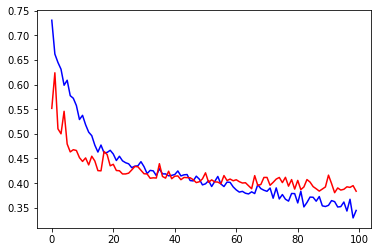

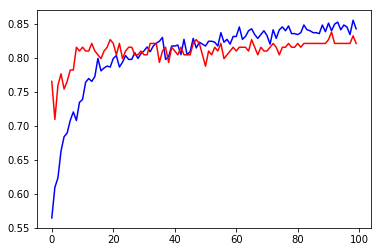

In [30]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

### Predict and Export pred.csv file

In [31]:
train_cols = data_train.columns
for col in data_test0.columns:
    if col not in train_cols:
        print(col)

In [32]:
final_acc_str = str(int(final_acc*10000))
run_name_acc = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name_acc)
cwd = os.getcwd()
pred_file = os.path.join(cwd, 'output', run_name_acc + '.csv')
print(pred_file)

Titanic_StatML_NN_20171030_234648_8212
D:\Kaggle\Titanic_Machine_Learning_From_Disaster\output\Titanic_StatML_NN_20171030_234648_8212.csv


In [33]:
display(data_test0.head(2))
y_data_pred = model.predict(data_test0.as_matrix())
print(y_data_pred.shape)
y_data_pred = np.squeeze(y_data_pred)
print(y_data_pred.shape)
y_data_pred = (y_data_pred > 0.5).astype(int)
print(y_data_pred)

print(data_test['PassengerId'].shape)
passenger_id = data_test['PassengerId']
output = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': y_data_pred })

output.to_csv(pred_file , index = False)

,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_Is_Child,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,16,1,34.5,1,0,1,1,1,7.8292,...,0,0,0,0,0,0,0,0,-1,-1
1,3,32,0,47.0,1,0,2,0,1,7.0000,...,0,0,0,0,0,0,0,0,-1,-1


(418, 1)
(418,)
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]
(418,)


In [34]:
print(run_name_acc)
print('Done!')

Titanic_StatML_NN_20171030_234648_8212
Done!
